In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn  as sk



haber = pd.read_csv("/haberman.csv")

In [ ]:
haber.head(50)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [ ]:
#number of points, numer of features, number of classes, data-points per class.
print(haber.shape)
print(haber.columns)
haber['status'].value_counts()




(306, 4)
Index([u'age', u'year', u'nodes', u'status'], dtype='object')


1    225
2     81
Name: status, dtype: int64

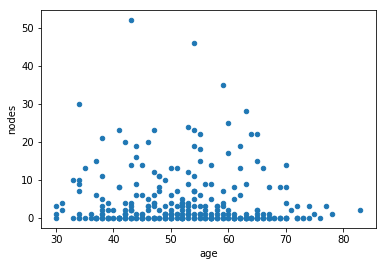

In [ ]:
haber.plot(kind='scatter', x='age', y='nodes') ;
plt.show()

/usr/local/lib/python2.7/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


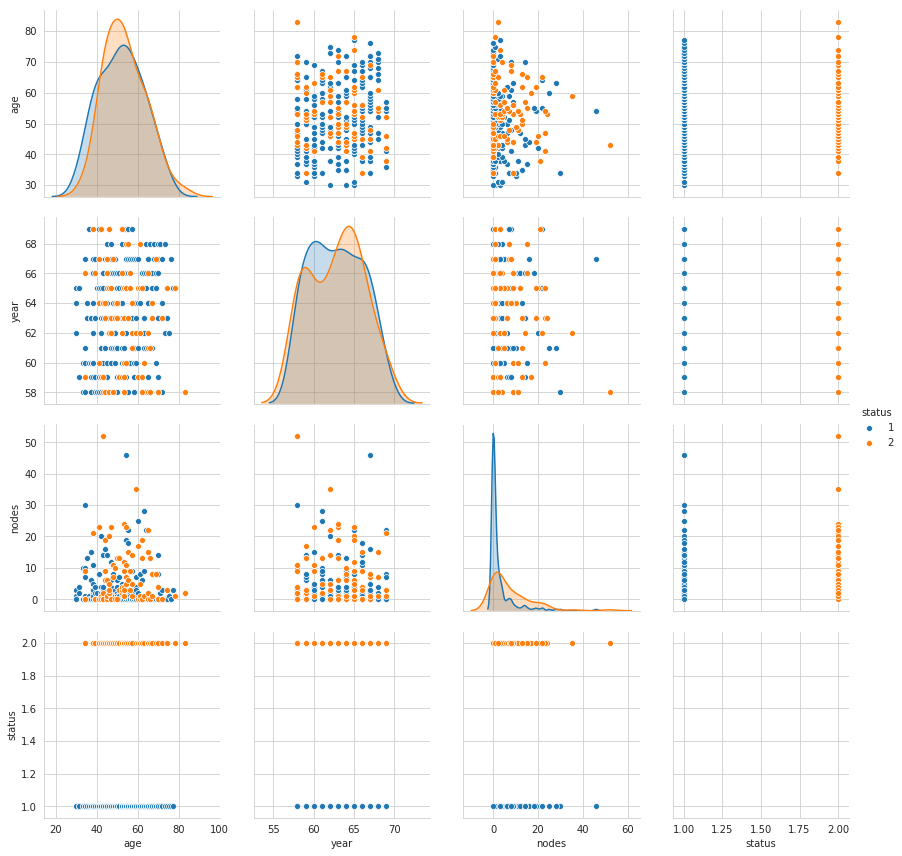

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(haber, hue="status", size=3);
plt.show()

/usr/local/lib/python2.7/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


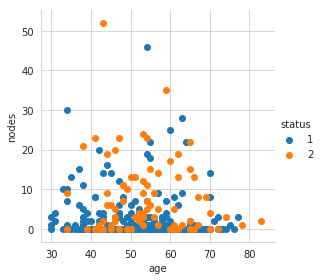

In [ ]:

sns.FacetGrid(haber, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
# save the figure
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(haber)
print(pca_data.shape)

(306, 2)


In [ ]:
pca_data

array([[-2.21256941e+01, -4.69269313e+00],
       [-2.23339871e+01, -2.70579717e+00],
       [-2.20215477e+01, -5.68614111e+00],
       [-2.13508506e+01, -3.63904553e+00],
       [-2.13235861e+01, -1.62339639e+00],
       [-1.99843721e+01,  4.48284977e+00],
       [-1.91784649e+01, -5.48038322e+00],
       [-1.82089603e+01, -5.39116752e+00],
       [-1.86751635e+01,  3.60737067e+00],
       [-2.04816389e+01,  2.44982685e+01],
       [-1.82563979e+01, -4.40876488e+00],
       [-1.88992693e+01,  4.56820842e+00],
       [-1.84984958e+01,  1.59864692e+00],
       [-1.81816962e+01, -5.40580701e+00],
       [-1.80382718e+01,  7.64469345e+00],
       [-1.70965934e+01, -5.32044836e+00],
       [-1.62628605e+01, -4.25961247e+00],
       [-1.59231566e+01, -5.22430727e+00],
       [-1.51913900e+01, -5.18207839e+00],
       [-1.51030559e+01, -5.17129594e+00],
       [-1.52502793e+01, -5.18926668e+00],
       [-1.56690453e+01,  7.96580236e-01],
       [-1.63119167e+01,  9.77355354e+00],
       [-1.

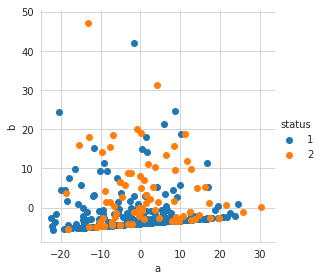

In [ ]:

df2 = pd.DataFrame(np.array(pca_data),
                   columns=['a', 'b'])
df2['status']=haber['status']
sns.set_style("whitegrid");

sns.FacetGrid(df2, size=4,hue='status') \
   .map(plt.scatter, "a", "b") \
   .add_legend();
plt.show()

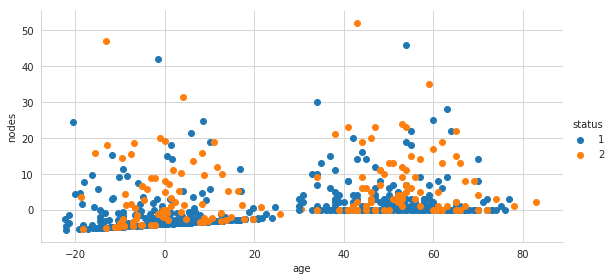

In [ ]:
#plt.subplots(1,2)
#plt.subplot(122)
haber['a']=df2['a']
haber['b']=df2['b']
#sns.scatterplot(data=haber, x="age", y="nodes", hue="status")
sns.FacetGrid(haber, hue="status", size=4, height=6, aspect=2) \
     .map(plt.scatter, "a", "b")\
     .map(plt.scatter, "age", "nodes").add_legend();
#plt.subplot(121)
#sns.scatterplot(data=df2, x="a", y="b", hue="status")
# sns.FacetGrid(df2, hue="status", size=4)\
#     .map(plt.scatter, "a", "b") \
#     .add_legend();
plt.show()

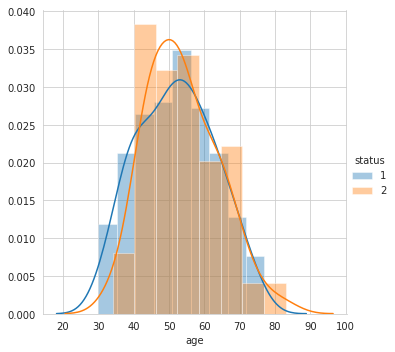

In [ ]:

sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

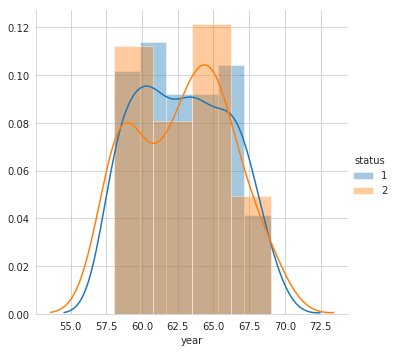

In [ ]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

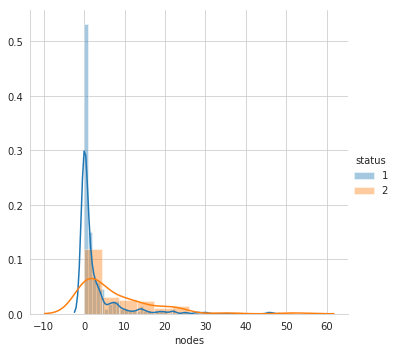

In [ ]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

ValueError: ignored

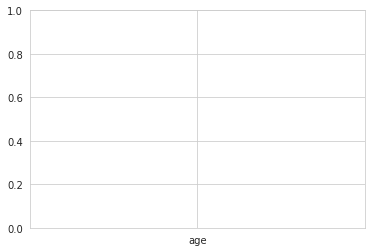

In [ ]:
df2.plot.bar(x = 'age', y = ['status1', 'status2'], rot = 40, ax = ax)